In [1]:
pip install tensorflow matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))



In [10]:
# Add the following before compiling the model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.1
)

# Fit the generator to your data
datagen.fit(train_images)

# Use the generator for training
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1563/1563 [==============================] - 139s 88ms/step - loss: 1.7829 - accuracy: 0.0966 - val_loss: 1.5724 - val_accuracy: 0.0945
Epoch 2/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4255 - accuracy: 0.0997 - val_loss: 1.5575 - val_accuracy: 0.1199
Epoch 3/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.3342 - accuracy: 0.1006 - val_loss: 1.2438 - val_accuracy: 0.1144
Epoch 4/5
1563/1563 [==============================] - 130s 83ms/step - loss: 1.2921 - accuracy: 0.1004 - val_loss: 1.3088 - val_accuracy: 0.0854
Epoch 5/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.2543 - accuracy: 0.1009 - val_loss: 1.1913 - val_accuracy: 0.1234


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc}")


313/313 - 6s - loss: 1.1913 - accuracy: 0.1234 - 6s/epoch - 18ms/step

Test Accuracy: 0.1234000027179718


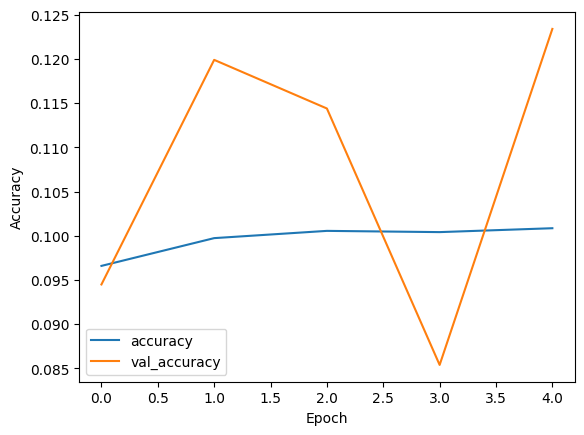

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
